# Mini Project --- Shape Matching(Identify Contours by shape)

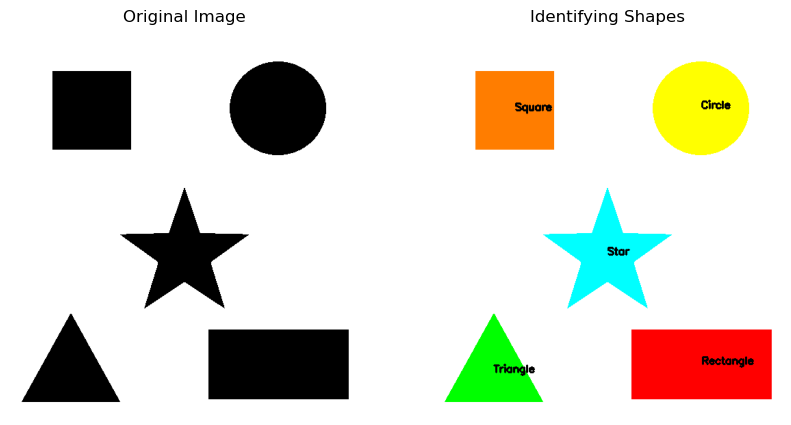

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("new_shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 1)

contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    M = cv2.moments(cnt)
    if M["m00"] == 0:
        continue
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])

    if len(approx) == 3:
        shape_name = "Triangle"
        color = (0, 255, 0)
    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(cnt)
        if abs(w - h) <= 3:
            shape_name = "Square"
            color = (0, 125, 255)
        else:
            shape_name = "Rectangle"
            color = (0, 0, 255)
    elif len(approx) == 10:
        shape_name = "Star"
        color = (255, 255, 0)
    elif len(approx) >= 15:
        shape_name = "Circle"
        color = (0, 255, 255)
    else:
        shape_name = "Unknown"
        color = (128, 128, 128)

    cv2.drawContours(image, [cnt], 0, color, -1)
    cv2.putText(image, shape_name, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

# Show original and result images using matplotlib subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(cv2.imread("new_shapes.png"), cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[1].set_title("Identifying Shapes")
axs[1].axis('off')

plt.show()




این کد یک تصویر را می‌خواند، اشکال موجود در آن را شناسایی می‌کند و هر شکل را با نوع آن (مثلث، مربع، مستطیل، ستاره، دایره یا ناشناخته) با استفاده از OpenCV برچسب‌گذاری می‌کند. در اینجا توضیح گام به گام آمده است:

1. **بارگذاری و پیش‌پردازش تصویر**  
    - تصویر `new_shapes.png` را می‌خواند.
    - آن را به تصویر خاکستری تبدیل می‌کند.
    - با اعمال آستانه‌گذاری باینری، اشکال را از پس‌زمینه جدا می‌کند.

2. **شناسایی کانتور (مرز اشکال)**  
    - کانتورهای تمام اشکال موجود در تصویر آستانه‌گذاری‌شده را پیدا می‌کند.

3. **تقریب و شناسایی شکل**  
    - برای هر کانتور:
      - کانتور را به یک چندضلعی با رأس‌های کمتر تقریب می‌زند.
      - مرکز جرم (مرکز شکل) را با استفاده از ممان‌های تصویر محاسبه می‌کند.
      - نوع شکل را بر اساس تعداد رأس‌ها تعیین می‌کند:
         - ۳: مثلث
         - ۴: مربع یا مستطیل (عرض و ارتفاع را بررسی می‌کند)
         - ۱۰: ستاره
         - ۱۵ یا بیشتر: دایره
         - در غیر این صورت: ناشناخته

4. **رنگ‌آمیزی و برچسب‌گذاری**  
    - شکل شناسایی‌شده را با رنگ خاصی پر می‌کند.
    - نام شکل را در مرکز آن می‌نویسد.

5. **نمایش**  
    - تصویر نهایی با اشکال برچسب‌گذاری‌شده را در یک پنجره نمایش می‌دهد.

